In [3]:
import sys
import os
import glob
from datetime import datetime
from collections import *
import pandas as pd
import numpy as np
import seaborn as sns
from dateutil import parser


sys.path.append('/home/kalkiek/projects/reddit-political-affiliation/')

from src.features.bad_actors.bad_actors import read_in_bad_actors_from_tsv
from src.features.political_affiliations.comment_political_affiliations import read_in_user_politics

### Read In The Bad Actors

In [13]:
bad_actors = read_in_bad_actors_from_tsv(['/shared/0/projects/reddit-political-affiliation/data/bad-actors/bad_actors.tsv'])
print("# of bad actors: {}".format(len(bad_actors)))

Reading in user politics from file: /shared/0/projects/reddit-political-affiliation/data/bad-actors/bad_actors.tsv
# of bad actors: 13302


In [14]:
def cust_count(l,query):
    c=0
    for item,idx in l:
        if item==query:
            c+=1
    return c

In [ ]:
bad_actors['Agkistro13']

In [15]:
search=bad_actors

In [16]:
dem_count=0
rep_count=0
close_count=0
very_divided_count=0
gap=2/3
year_month_flip = Counter()
year_month_normal=Counter()
year_month_from_rep2dem=Counter()
year_month_from_dem2rep=Counter()
for key in search:
    times=search[key]
    time_list=[]
    poli_list=[]
    for time in times:
        poli_list.append(time[0])
        first_pol_post_ts = int(time[1])
        first_post_date = datetime.fromtimestamp(first_pol_post_ts)
        year_month = str(first_post_date.year) + '-' + str(first_post_date.month)
        time_list.append(year_month)
    for i in range(len(time_list)):
        year_month=time_list[i]
        if (i!=0 and i!=len(time_list)-1 and times[i][0]!=times[i-1][0] and times[i][0]!=times[i+1][0]) or (i==len(time_list)-1 and times[i][0]!=times[i-1][0]):
            year_month_flip[year_month]+=1
            if times[i][0]=='Democrat':
                year_month_from_rep2dem[year_month]+=1
            else:
                year_month_from_dem2rep[year_month]+=1
        year_month_normal[year_month]+=1
    #print(poli_list,time_list)
    
    
    dem_times=cust_count(times,'Democrat')
    rep_times=len(times)-dem_times
    if dem_times!=0 and rep_times!=0 and dem_times/rep_times>=gap and dem_times/rep_times<=1/gap:
        close_count+=1
        if dem_times>=10:
            very_divided_count+=1
            print("Best Actor:",key,", Number of Dems:,",dem_times,", Numer of Reps:",rep_times)
        #print(dem_times,rep_times)
    elif dem_times>rep_times:
        dem_count+=1 
    elif dem_times<rep_times: 
        rep_count+=1
print("Mainly dem users",dem_count)
print("Mainly rep users",rep_count)
print("Close users",close_count)
print("Very_divided",very_divided_count)
print(year_month_flip)

KeyError: 0

In [105]:
year_month_percentage=Counter()
for key in year_month_flip:
    year_month_percentage[key]=year_month_flip[key]/(year_month_normal[key] if year_month_normal[key]!=0 else float('inf'))

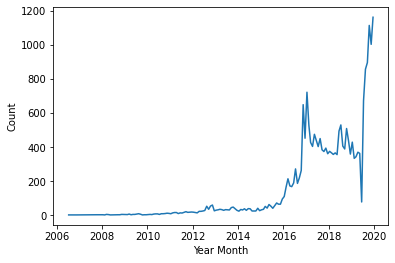

In [116]:
rows = []
for year_month, count in dict(year_month_flip).items():
    row = {'Year Month': parser.parse(year_month), 'Count': int(count)}
    rows.append(row)
    
flip_time = pd.DataFrame(rows)#flip_time
sns.lineplot(data=flip_time, x='Year Month', y='Count')

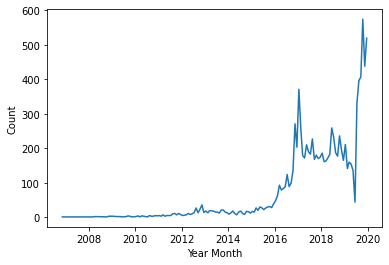

In [121]:
rows = []
for year_month, count in dict(year_month_from_rep2dem).items():
    row = {'Year Month': parser.parse(year_month), 'Count': int(count)}
    rows.append(row)
    
flip_time = pd.DataFrame(rows)#flip_time
sns.lineplot(data=flip_time, x='Year Month', y='Count')

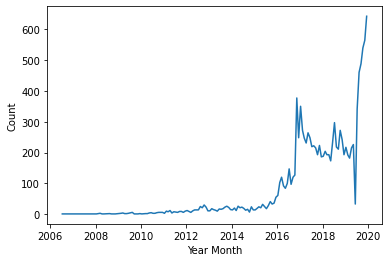

In [115]:
rows = []
for year_month, count in dict(year_month_from_dem2rep).items():
    row = {'Year Month': parser.parse(year_month), 'Count': int(count)}
    rows.append(row)
    
flip_time = pd.DataFrame(rows)#flip_time
sns.lineplot(data=flip_time, x='Year Month', y='Count')

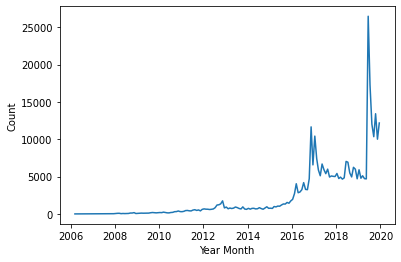

In [109]:
rows = []
for year_month, count in dict(year_month_normal).items():
    row = {'Year Month': parser.parse(year_month), 'Count': int(count)}
    rows.append(row)
    
normal_time = pd.DataFrame(rows)#flip_time
sns.lineplot(data=normal_time, x='Year Month', y='Count')

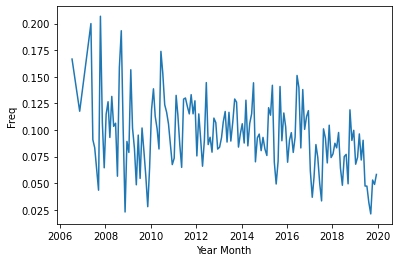

In [111]:
rows = []
for year_month, count in dict(year_month_percentage).items():
    row = {'Year Month': parser.parse(year_month), 'Freq': count}
    rows.append(row)
    
percentage_time = pd.DataFrame(rows)#flip_time
sns.lineplot(data=percentage_time, x='Year Month', y='Freq')

In [20]:
all_comments_of_bad_actors_by_month=os.listdir(comments_dir)